Goodness of a fit 
==========
This notebook illustrates different aspects of the goodness of a fit (bias-variance tradeoff, and over or under-fitting) by using [the polynomial regression](https://en.wikipedia.org/wiki/Polynomial_regression) in the context of one explanatory variable.  
We briefly describe hereafter the theory of the polynomial regresion.

Polynomial regression
----------
We are looking at explaining or predicting $y$ from only one explanatory variable $x$. For example, a quadratic regression model estimates $y$ by using the following  function $f$:
  $$y\approx f(x)=a_0\times 1 + a_1\times x + a_2\times x^2$$
where $(a,b,c)$ are the trainable parameters. The function $f$ is thus a linear combination of the following basic functions of $x$: $(1,x,x^2)$.  

The Figure below displays curves for different values of $(a,b,c)$ parameters.

In [14]:
# Some import
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
#  import regressiondemo (the file regressiondemo.py needs to be in the same folder than this notebook)
#sys.path.append(os.getcwd())
import regressiondemo as rd

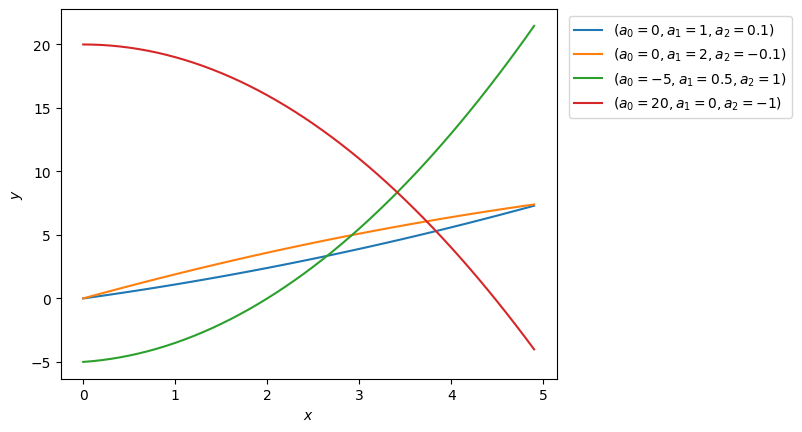

In [15]:
# Generate points between (0,5)
x = np.arange(0., 5., 0.1)

def makelabel(a,b,c):
    return r'$(a_0=' + str(a0) + ', a_1=' + str(a1) + ', a_2=' + str(a2) + ')$'

# Curves for different value parameters
[a0,a1,a2]  = [0,1,0.1]
plt.plot(x, a0 + a1*x + a2*x**2, label=makelabel(a0,a1,a2))
[a0,a1,a2]  = [0,2,-0.1]
plt.plot(x, a0 + a1*x + a2*x**2, label=makelabel(a0,a1,a2))
[a0,a1,a2]  = [-5,0.5,1]
plt.plot(x, a0 + a1*x + a2*x**2, label=makelabel(a0,a1,a2))
[a0,a1,a2]  = [20,0,-1]
plt.plot(x, a0 + a1*x + a2*x**2, label=makelabel(a0,a1,a2))
plt.legend(bbox_to_anchor=(1.01, 1.0))
plt.ylabel(r'$y$')
plt.xlabel(r'$x$')
plt.show()

In the case of a polynomial regression of degree $n$ (also named *order*), we search for $n+1$ coefficients such as
$$y\approx f(x) = a_0 + a_1x + a_2x^2 + \cdots a_nx_n = \sum_{i=0}^n a_ix^i $$

# Construction of a synthetic dataset
We construct here a synthetic dataset for which we know the function that allows us to generate new data.
The advantage of synthetic dataset is to control the different setting such as the number of (training and testing) examples, and the degree of the polynomial functions.

## Setting
The dataset has several characteristics including the number of observations, the function $f$ to generate new data, the type and level of noise, or the minimum and maximum values for the display.

The values of $x$ are selected at random in the following ranges for a given number of examples:
+ *rd.xmin* : minimum for $x$ from the "regressiondemo.py" library, set to 0
+ *rd.xmax* : maximum for $x$ from the "regressiondemo.py" library, set to 10
+ *m* : number of points/observations, defined locally in the notebook

The values of $y$ depends on the "true" function $f$ and the level of noise:
+ *truefunc()* : the "true" function $f$ that generates the data, defined locally in the notebook
+ *sigma* : the standard-deviation of the noise, defined locally in the notebook

For the display, $y$ values are restrained to 
+ *ydisplaymin* : minimum of $y$, defined locally in the notebook
+ *ydisplaymax* : maximum of $y$, defined locally in the notebook

## Step 1.1: generation of non-noisy data
First, we generate non-noisy data. Observations follows perfectly the funciton $f$. The function $f$, the number of observations (traning data), and the noise level can be modified in the following cells.

In [16]:
##############################
#      Setting
#=======================
# The true function (f(x))
def truefunc(x):
    return np.sin(x*2.0)*np.sqrt(x)/3.3

#  for the display
ydisplaymin = -1.8
ydisplaymax = 1.8

#  do not test for m>100 (O(m^3))
m = 20

# generate a vector x (at random)
x = rd.makeX(m)
# true y values
yt = truefunc(x)

# generate xts and yts for the dispaly (strong point density)
xts = rd.makeX(200,uniform=True)
yts = truefunc(xts)

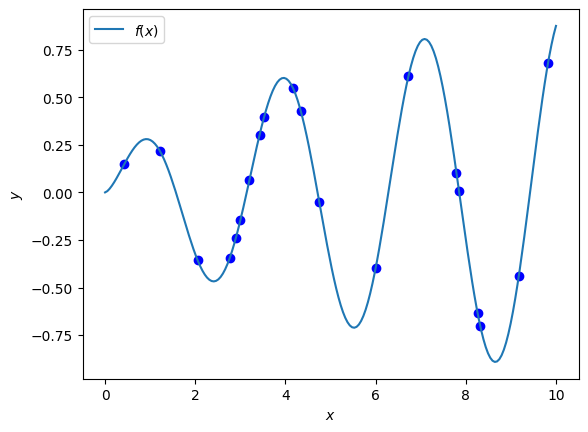

In [17]:
# Figure: observations and known function
plt.figure()
plt.plot(x, yt, 'bo')
plt.plot(xts, yts,label = r'$f(x)$') 
plt.ylabel(r'$y$')
plt.xlabel(r'$x$')
plt.legend()
plt.show()

## Step 1.2:  Adding some noise
To get more real data, a commonly used approach consists in adding some noise to $y$.
Here, we add a Gaussian noise (standard deviation *sigma*).

What does represent the figure below?

In [18]:
#  Add Gaussian noise
y = rd.addNoise(yt,laplace=False)

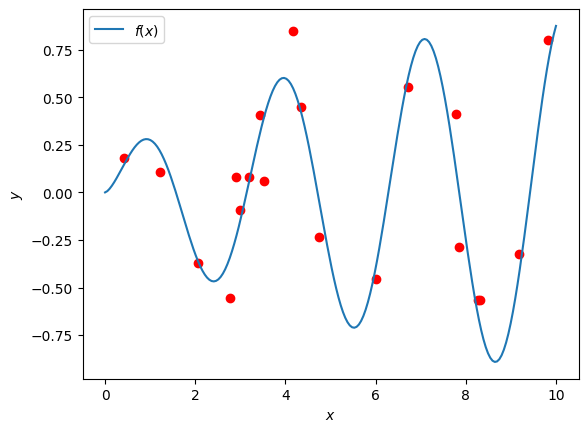

In [19]:
# Figure: observations and known function
plt.figure()
plt.plot(x, y, 'ro')
plt.plot(xts, yts,label = r'$f(x)$') 
plt.ylabel(r'$y$')
plt.xlabel(r'$x$')
plt.legend()
plt.show()

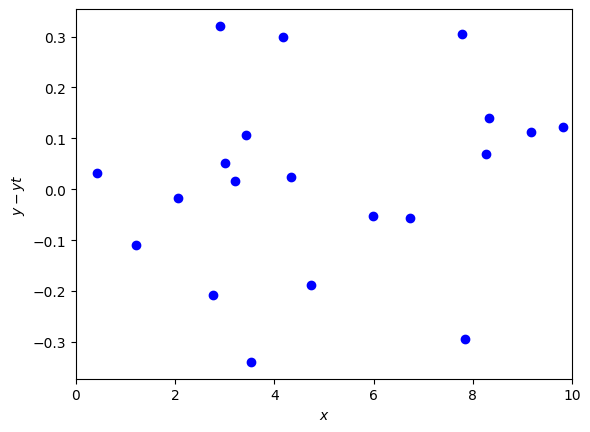

In [20]:
# Figure: noise dispersion
plt.figure()
plt.plot(x, y-yt, 'bo')
plt.ylabel(r'$y-yt$')
plt.xlabel(r'$x$')
plt.xlim(rd.xmin,rd.xmax)
plt.show()

Draw an histogram to see the noise distribution

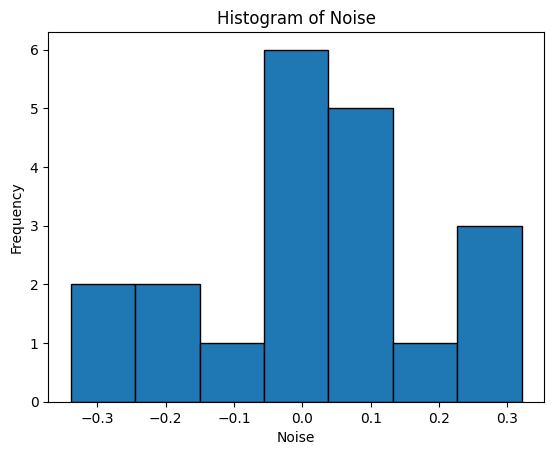

In [24]:
# Your code (histogram)

import matplotlib.pyplot as plt
import numpy as np

# Create a histogram of the noise
plt.figure()
plt.hist(y-yt, bins=7, edgecolor='black')
plt.xlabel('Noise')
plt.ylabel('Frequency')
plt.title('Histogram of Noise')
plt.show()


# Polynomial regression
We will use the polynomial regression function of Numpy: *np.polyfit()*.  
This determines the parameter $a_i$ ($0\le i \le n$), where $n$ is the degree of the polynomial function, which minimise the quadratic cost (same cost than for the linear regression):
    $$\sum_{i=1}^m (y_i-f(x_i))^2 $$

Here, we do not have interest in the optimisation algorithm (we could use for example the gradient descent algorithm).

## Step 1.3: polynomial regression
Let us try first with a polynom of order 4.
Please note that the thick blue line is $f$, whereas the green curve (thiner) corresponds to the learned model $\hat{f}$.

In [25]:
##############################
#      Setting
#      =======================
#     change the *order* value to test for polynoms of different degrees
order = 10
##############################

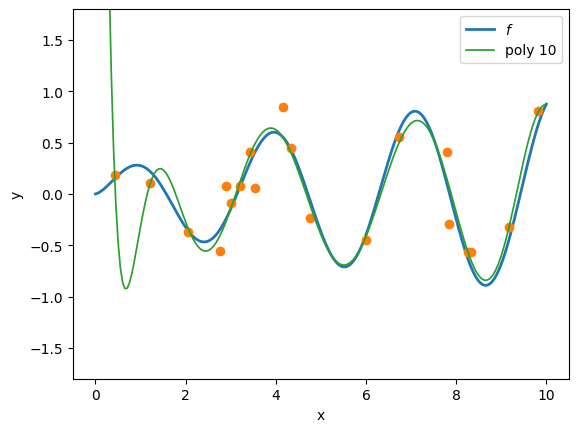

In [26]:
# plot data and the truth
plt.plot(xts, yts,label = r'$f$', linewidth=2) 
plt.plot(x, y, 'o') 
plt.ylabel('y')
plt.xlabel('x')

#  build the fitted poly curve (xts,ys) from order-th regression
ys = rd.linReg(x,y,xts,order)

#  plot fitted curve
plt.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )  
plt.ylim(ydisplaymin,ydisplaymax)
plt.legend()

The polynomial functions of low degree do not work very well to explain our complex $f$ function. You can try with an higher order and more data points.

## Step 1.4: on a mystery function
Here we generate new data. The function *rd.demoReg1()* defines its own function $f$ to generate data.

In [27]:
#  set the noise level before the generation
rd.setSigma(0.5)
# number of data points
m = 40
# generate the data points with the unknown function
x, y = rd.demoReg1(m)


The objective here is to make vary in a systematic manner (i.e., write a script) the number of data points, the order of the polynom to fit, and then the level of noise. Based on the plot, you should comment on the bias-variance tradeoff and what influences it in this experience. 

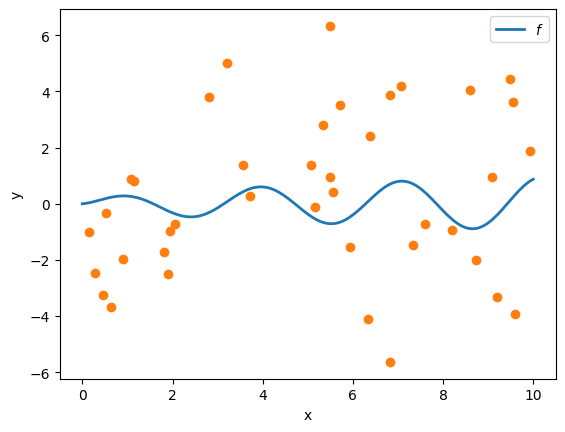

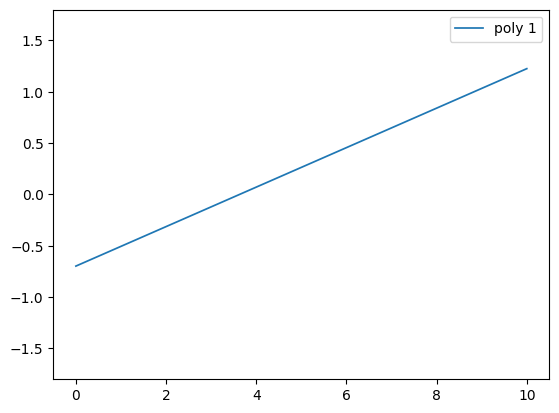

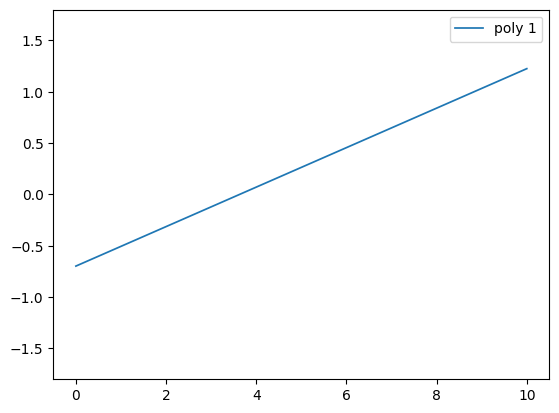

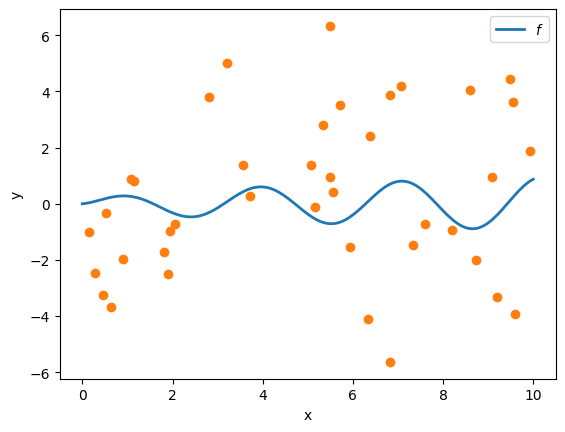

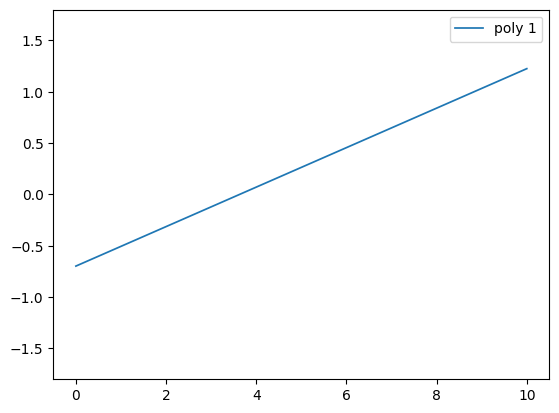

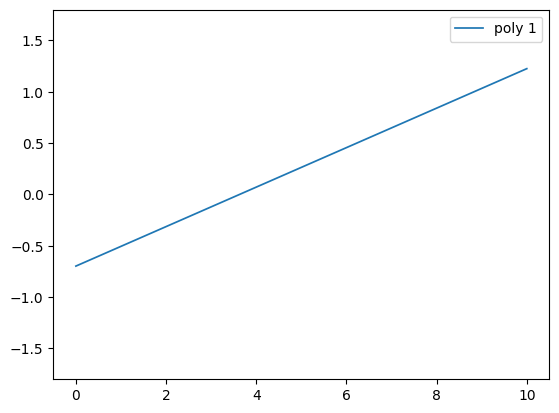

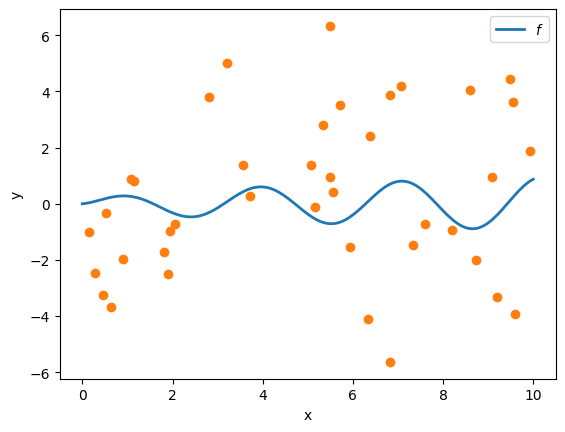

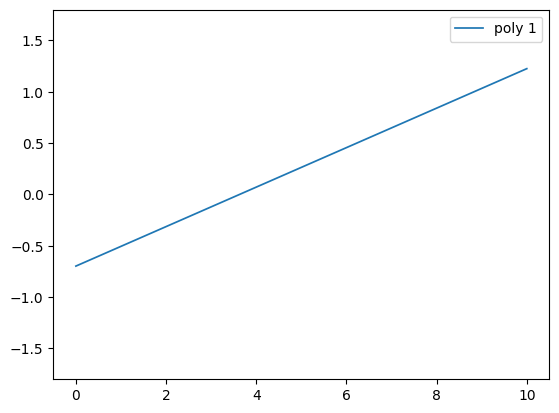

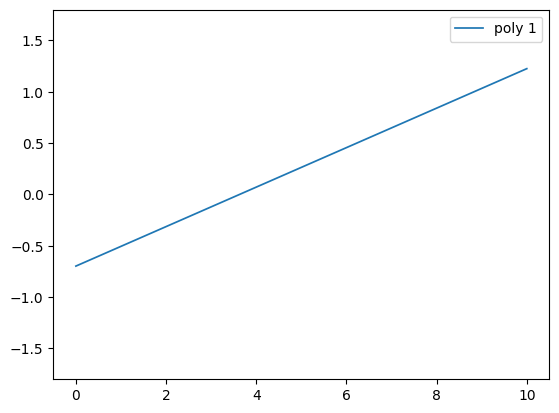

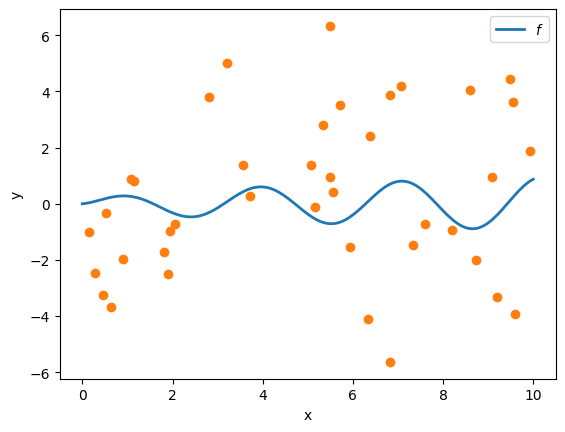

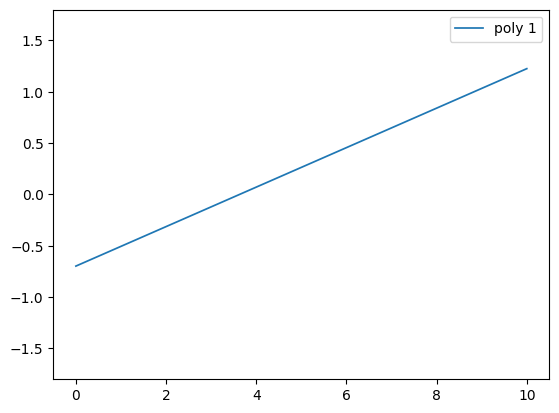

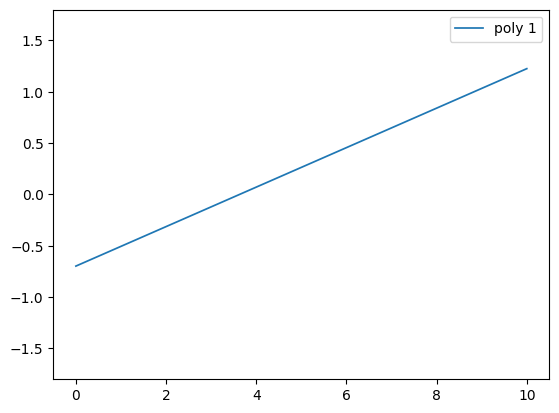

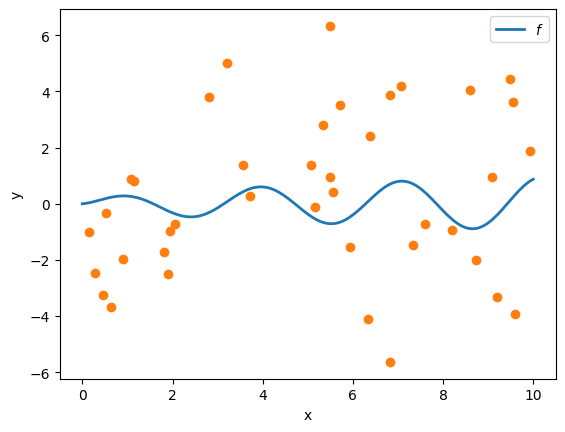

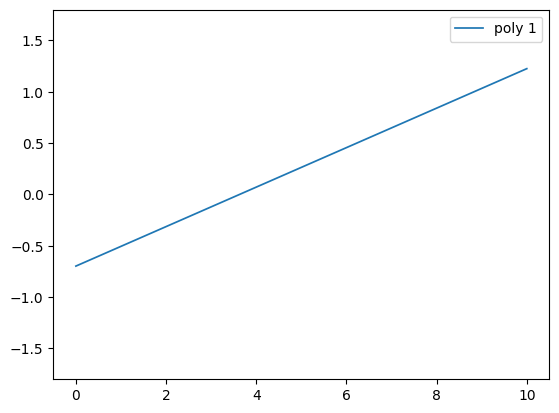

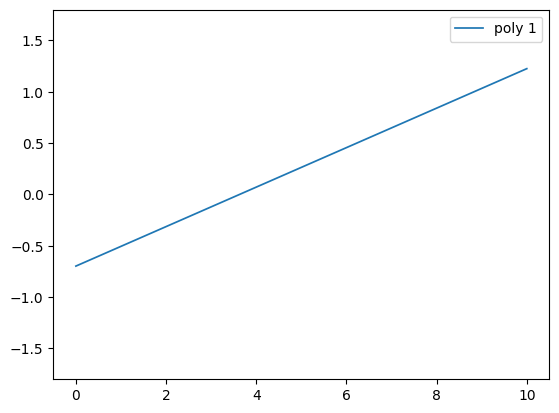

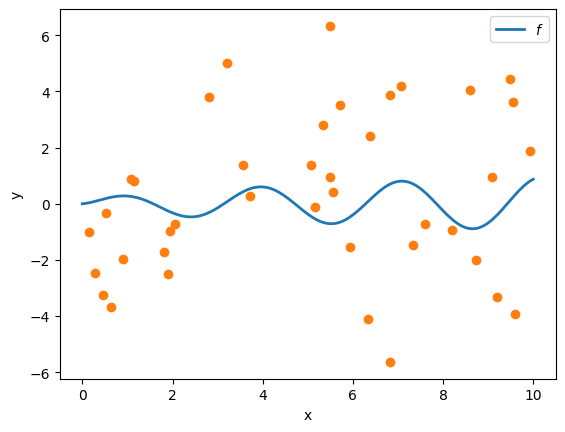

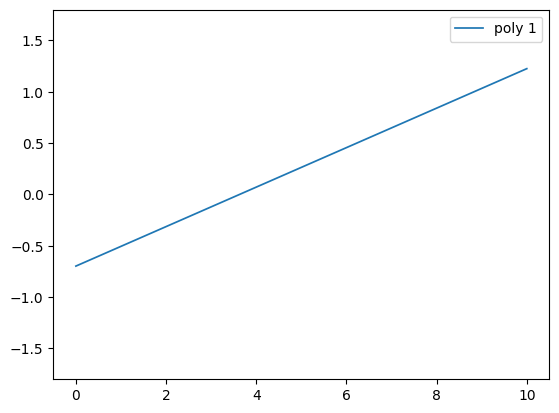

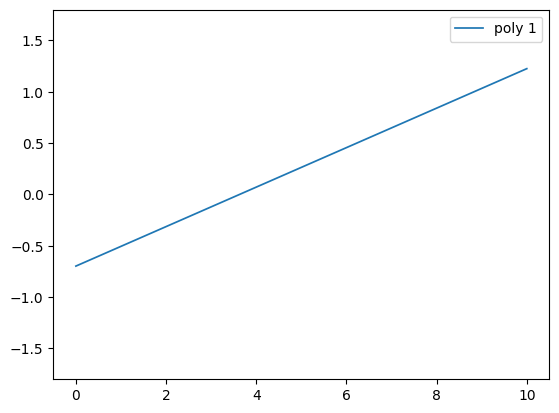

TypeError: 'int' object is not iterable

In [30]:
# Based on numer of observations
m = [40, 80, 120, 160, 200]
# Based on order of the polynom
order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# Based on noise levels
sigma = [0.5, 1, 1.5, 2, 2.5, 3]

for m in m:
    rd.makeX(m)
    x, y = rd.demoReg1(m)
    for order in order:
        for sigma in sigma:
            rd.setSigma(sigma)
            # plot data and the truth
            plt.plot(xts, yts,label = r'$f$', linewidth=2) 
            plt.plot(x, y, 'o') 
            plt.ylabel('y')
            plt.xlabel('x')
            plt.legend()
            plt.show()
            #  build the fitted poly curve (xts,ys) from order-th regression
            ys = rd.linReg(x,y,xts,order)

            #  plot fitted curve    
            plt.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )
            plt.ylim(ydisplaymin,ydisplaymax)
            plt.legend()    
            plt.show()
            #  build the fitted poly curve (xts,ys) from order-th regression
            ys = rd.linReg(x,y,xts,order)

            #  plot fitted curve    
            plt.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )
            plt.ylim(ydisplaymin,ydisplaymax)
            plt.legend()
            plt.show()
    
            
         

In [ ]:
rd.setSigma(sigma)

**Your comments:**